In [1]:
# Importing the libraries required
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Loading the dataset for analysis
df=pd.read_csv("DoctorVisits - DA.csv")

In [4]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [21]:
#Removing the useless column.
df=df.drop("Unnamed: 0",axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     5190 non-null   int64  
 1   gender     5190 non-null   object 
 2   age        5190 non-null   float64
 3   income     5190 non-null   float64
 4   illness    5190 non-null   int64  
 5   reduced    5190 non-null   int64  
 6   health     5190 non-null   int64  
 7   private    5190 non-null   object 
 8   freepoor   5190 non-null   object 
 9   freerepat  5190 non-null   object 
 10  nchronic   5190 non-null   object 
 11  lchronic   5190 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 486.7+ KB


In [23]:
#Checking whether there is null values or not.
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

In [24]:
# Replacing the columns with 1,0
df=df.replace(["yes","no"],[1,0])
df['age']=df['age']*100
df['income']=df['income']*100

In [25]:
#Conversion of age into integer datatype
df['age']=df['age'].astype(int)

In [6]:
df["illness"].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

C:\Users\91939\AppData\Local\Temp\ipykernel_2072\2541272497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['illness'], color='g')


<Axes: xlabel='illness', ylabel='Density'>

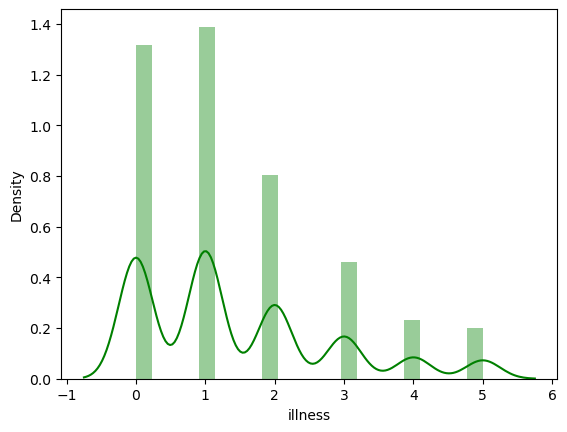

In [26]:
#Plotting the count of illness people.
sns.distplot(df['illness'], color='g')

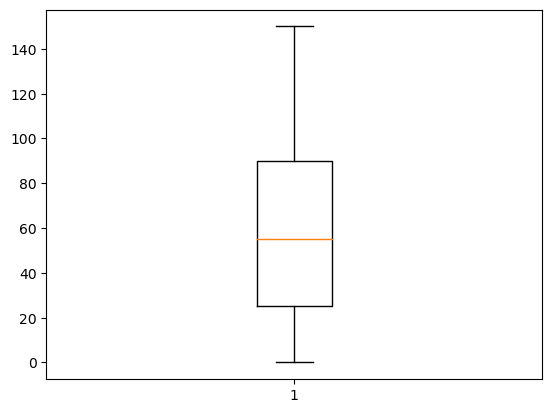

In [27]:
y=list(df.income)
plt.boxplot(y)
plt.show()

In [28]:
df["gender"].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

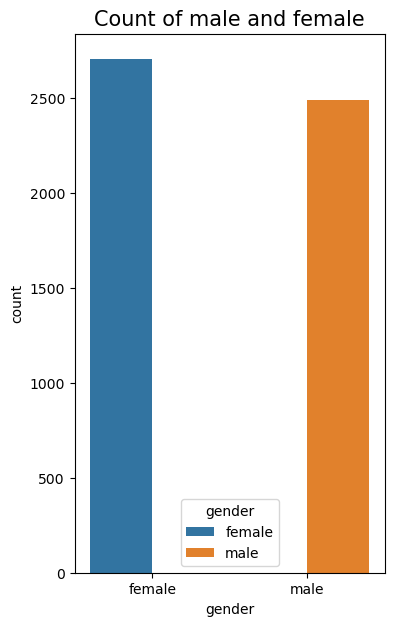

In [32]:
#Plot for the count of male and female.
plt.figure(figsize=(4,7))
sns.countplot(x='gender', hue='gender', data=df)

plt.title('Count of male and female', size=15)
plt.show()

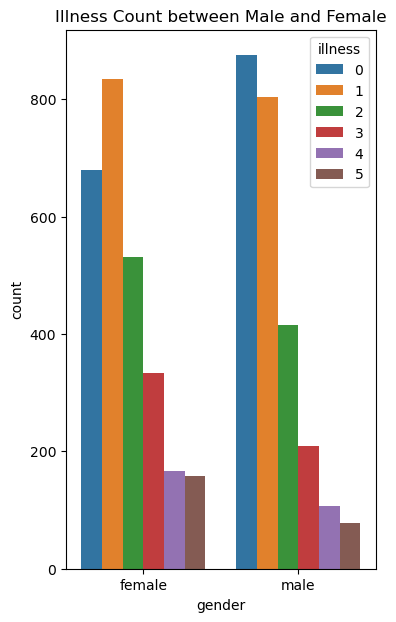

In [33]:
# Plot for illness count for male and female
plt.figure(figsize=(4,7))
sns.countplot(x='gender', hue='illness', data=df)

plt.title('Illness Count between Male and Female')
plt.show()

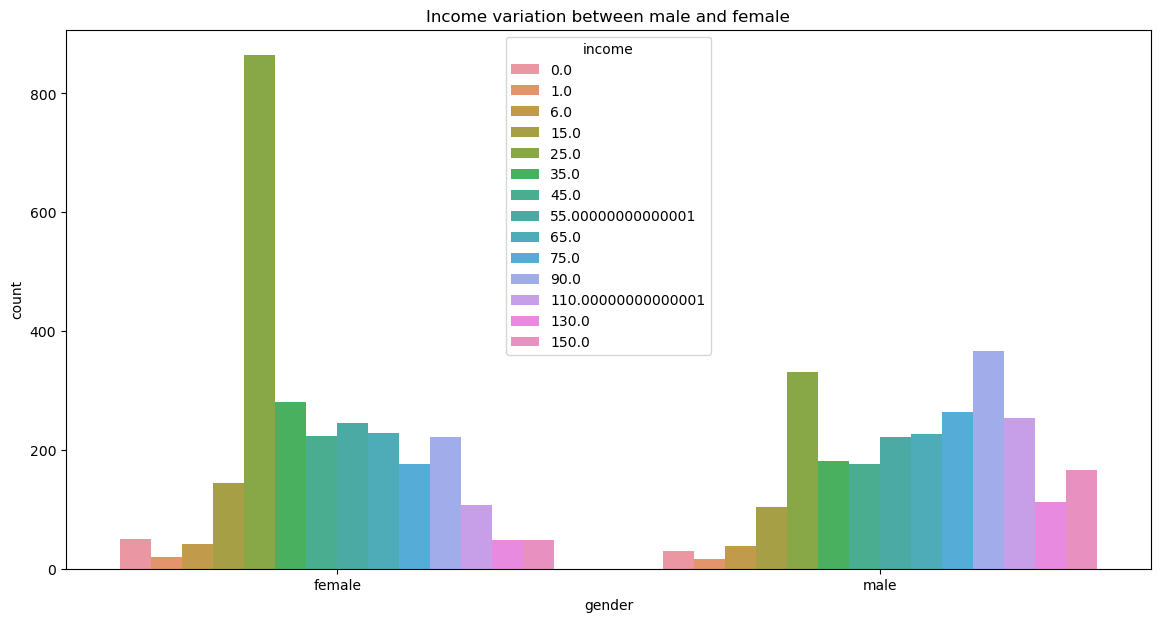

In [34]:
#Plot for Income variation between male and female
plt.figure(figsize=(14,7))
sns.countplot(x='gender', hue='income', data=df)

plt.title('Income variation between male and female')
plt.show()

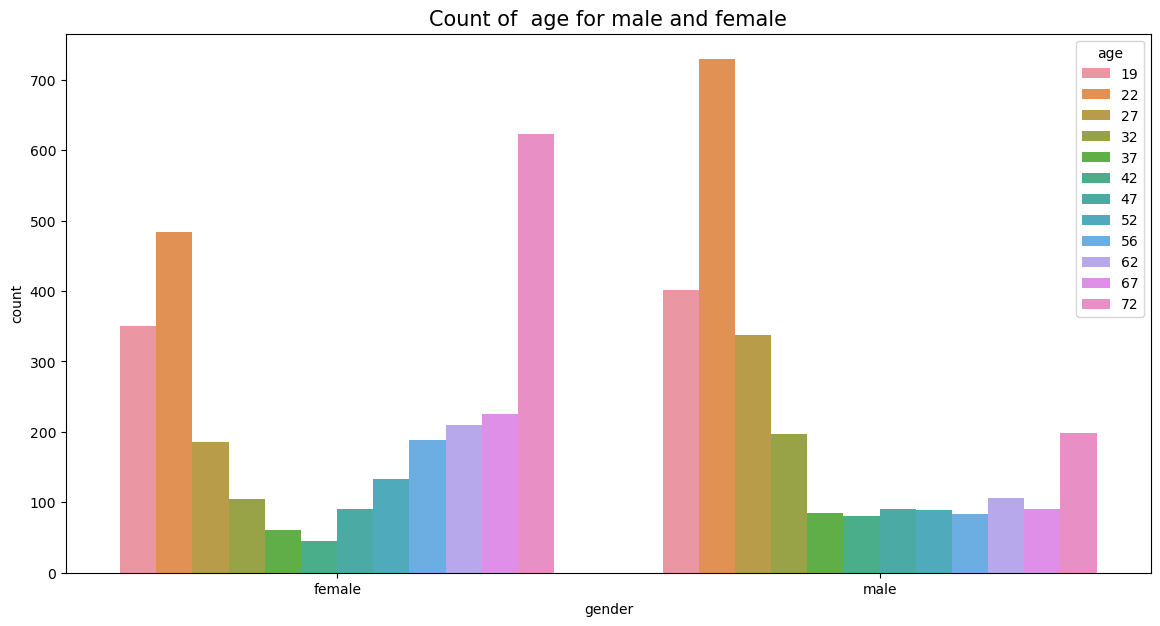

In [35]:
#Plot for Count of  age for male and female
plt.figure(figsize=(14,7))
sns.countplot(x='gender', hue='age', data=df)

plt.title('Count of  age for male and female', size=15)
plt.show()

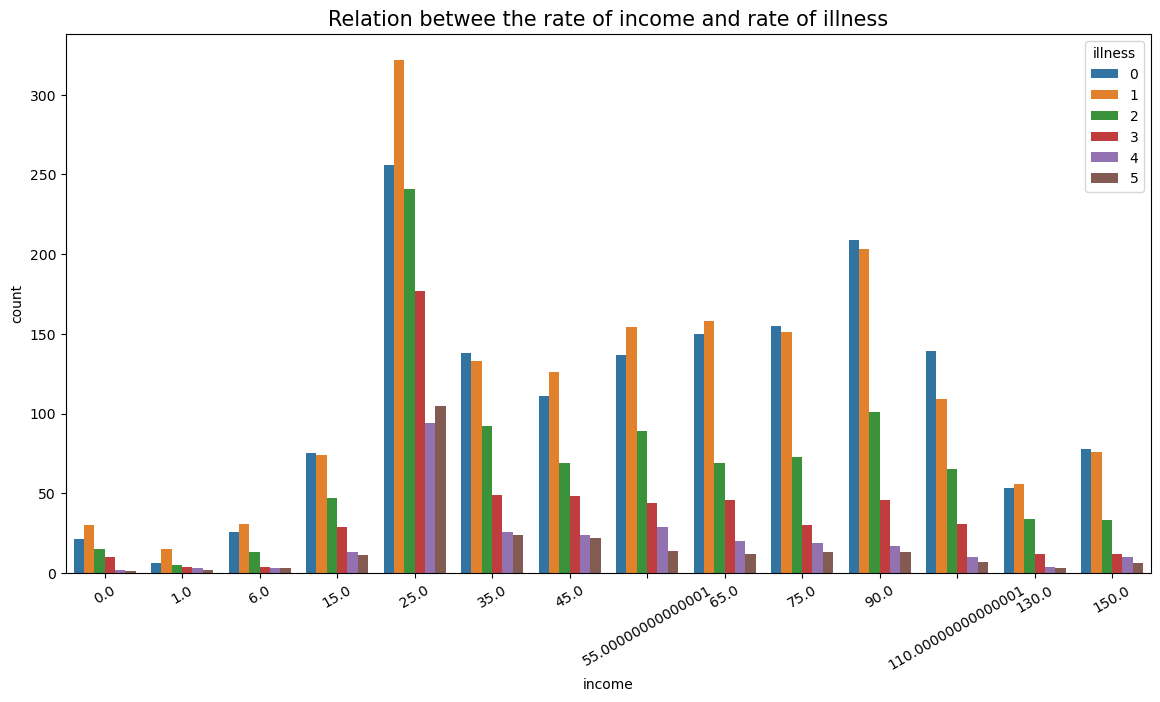

In [36]:
#Plot for relation betwee the rate of income and rate of illness
plt.figure(figsize=(14,7))
sns.countplot(x='income', hue='illness', data=df)
plt.xticks(rotation=30)
plt.title('Relation betwee the rate of income and rate of illness', size=15)
plt.show()

Text(0.5, 1.0, 'Relation between Age and Income')

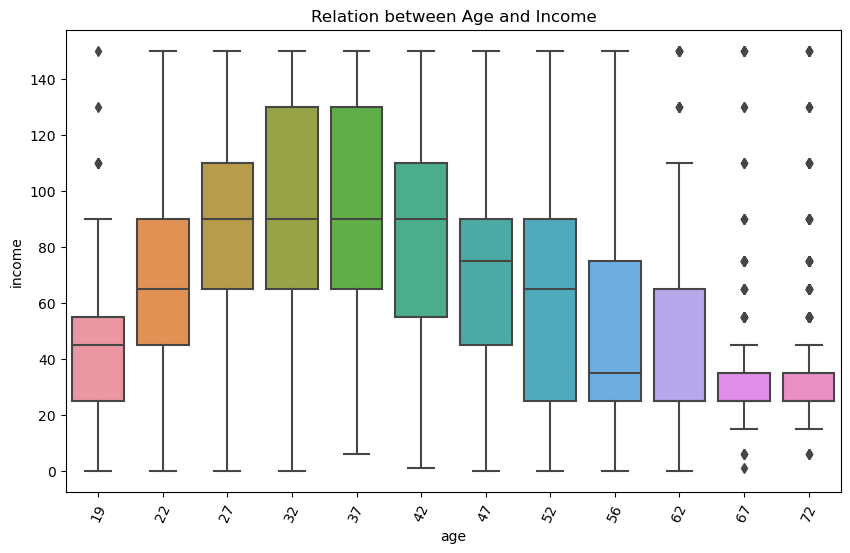

In [37]:
#Plot for showing Relation between Age and Income
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='age', y='income', data=df)
plt.setp(ax.artists, alpha=.7, linewidth=2, edgecolor="k")
plt.xticks(rotation=65)
plt.title("Relation between Age and Income")

In [29]:
df.groupby(['gender','reduced']).mean()

visits        age      income   illness    health   private  \
gender reduced                                                                  
female 0        0.229322  46.505908   48.273523  1.462144  1.115098  0.472210   
       1        0.400000  32.526316   54.210526  2.242105  1.610526  0.505263   
       2        0.672727  39.072727   56.018182  2.236364  1.781818  0.545455   
       3        1.333333  40.288889   51.600000  2.733333  1.733333  0.577778   
       4        0.851852  45.740741   46.666667  2.222222  2.074074  0.555556   
       5        1.444444  40.111111   61.444444  2.222222  2.500000  0.444444   
       6        1.363636  42.454545   62.272727  2.363636  1.363636  0.181818   
       7        1.384615  43.538462   47.346154  2.653846  2.230769  0.538462   
       8        1.090909  47.000000   40.454545  2.181818  4.000000  0.181818   
       9        0.500000  56.000000   82.500000  3.000000  1.000000  0.500000   
       10       2.142857  51.142857   42.142857  2.571429  2.000000  0.428571   
       12       2.000000  72.000000   25.000000  3.500000  5.500000  1.000000   
       13       4.000000  72.000000   30.000000  4.500000  3.500000  1.000000   
       14       1.543103  55.112069   42.758621  2.534483  4.112069  0.318966   
male   0        0.136007  34.437990   69.439834  1.099585  0.924850  0.409405   
       1        0.304878  28.609756   67.634146  1.743902  1.256098  0.524390   
       2        0.471698  34.264151   65.301887  2.358491  1.547170  0.433962   
       3        0.724138  33.413793   74.137931  2.137931  1.689655  0.413793   
       4        0.722222  30.833333   86.944444  2.055556  2.000000  0.500000   
       5        1.136364  33.181818   57.045455  2.272727  2.818182  0.500000   
       6        0.833333  34.000000   59.166667  2.500000  2.000000  0.333333   
       7        0.750000  31.416667   65.500000  2.583333  4.333333  0.416667   
       8        1.333333  36.333333   83.333333  2.666667  2.000000  0.333333   
       9        2.200000  30.800000   39.200000  2.400000  2.000000  0.400000   
       10       1.800000  47.800000   59.000000  2.600000  4.600000  0.000000   
       11       5.000000  32.000000  100.000000  1.500000  0.500000  0.500000   
       12       2.000000  36.750000   51.500000  1.500000  1.000000  0.250000   
       13       4.000000  51.000000   35.000000  3.333333  2.333333  0.333333   
       14       1.555556  47.652778   59.861111  2.375000  3.527778  0.402778   

                freepoor  freerepat  nchronic  lchronic  
gender reduced                                           
female 0        0.030635   0.303282  0.475711  0.098468  
       1        0.063158   0.126316  0.568421  0.168421  
       2        0.036364   0.200000  0.527273  0.181818  
       3        0.066667   0.244444  0.422222  0.222222  
       4        0.000000   0.259259  0.333333  0.222222  
       5        0.111111   0.166667  0.555556  0.166667  
       6        0.000000   0.454545  0.363636  0.272727  
       7        0.000000   0.230769  0.423077  0.269231  
       8        0.000000   0.454545  0.363636  0.454545  
       9        0.000000   0.500000  1.000000  0.000000  
       10       0.000000   0.428571  0.428571  0.285714  
       12       0.000000   0.000000  0.500000  0.500000  
       13       0.000000   0.000000  0.000000  1.000000  
       14       0.008621   0.517241  0.448276  0.431034  
male   0        0.054864   0.110650  0.321807  0.088981  
       1        0.036585   0.036585  0.378049  0.097561  
       2        0.056604   0.037736  0.301887  0.245283  
       3        0.103448   0.068966  0.379310  0.137931  
       4        0.000000   0.000000  0.222222  0.166667  
       5        0.090909   0.090909  0.318182  0.181818  
       6        0.000000   0.000000  0.500000  0.333333  
       7        0.083333   0.083333  0.333333  0.250000  
       8        0.000000   0.166667  0.333333  0.000000  
       9        0.200000   0.000000  0.400000  0.200000 

<Axes: >

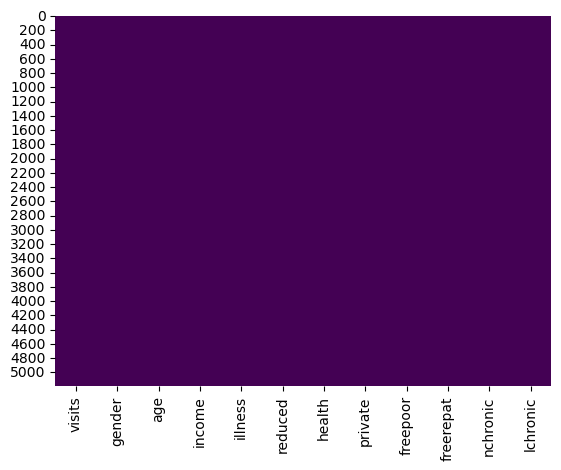

In [30]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Find out the correlation between variables in the given dataset and different variables

C:\Users\91939\AppData\Local\Temp\ipykernel_2072\221957065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True)


<Axes: >

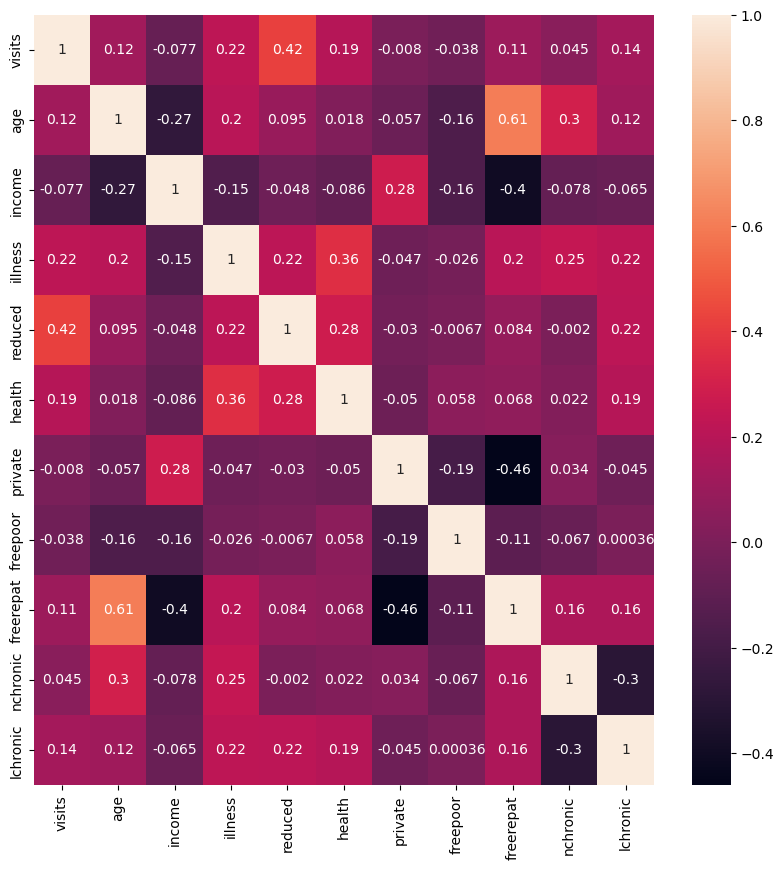

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True)

# Analyse how the income of a patient affects the no of visits to the hospital

Text(0, 0.5, 'visits')

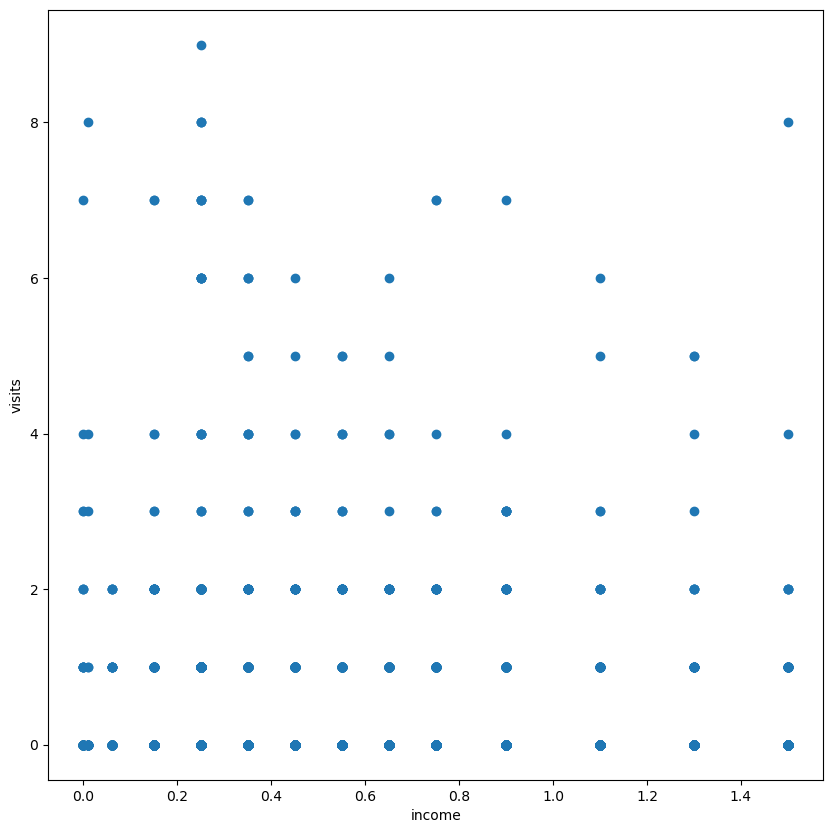

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and visualize the number of males and females affected by illness



<Axes: xlabel='gender', ylabel='Count'>

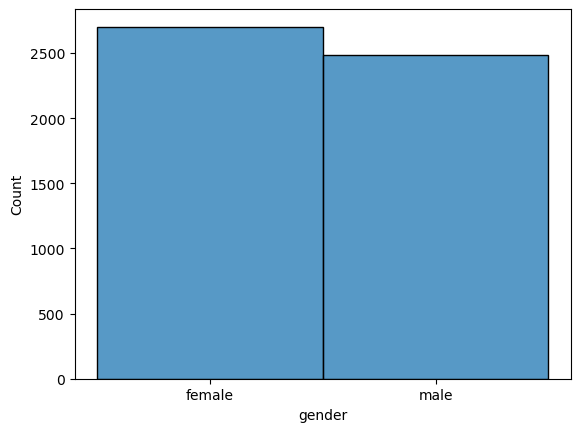

In [15]:
sns.histplot(df.gender,bins=2)

# Visualize the percentage of people getting govt health insurance due to low income, due to old age and also the percentage of people having private health insurance

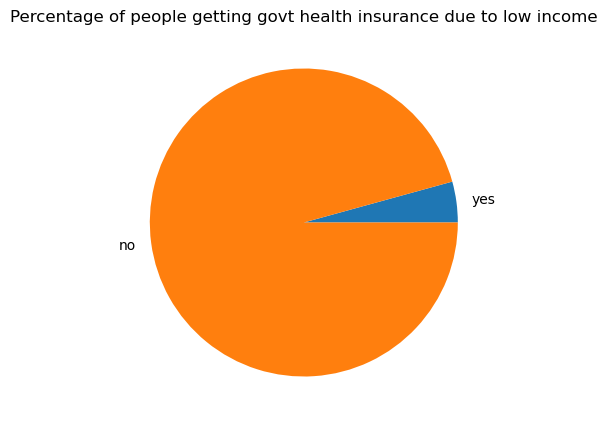

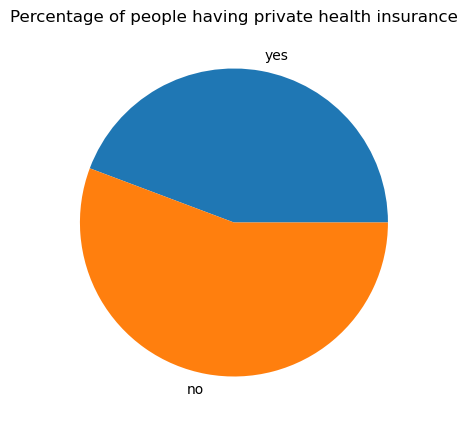

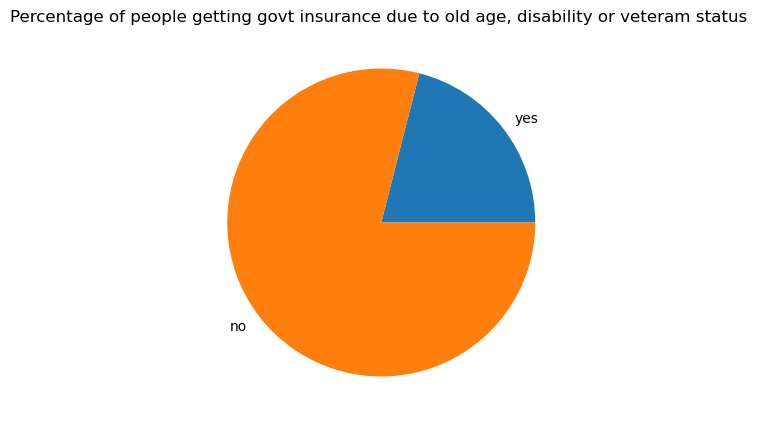

In [16]:
label=['yes','no']
Y=df[df['freepoor']=='yes']
N=df[df['freepoor']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("Percentage of people getting govt health insurance due to low income")
plt.show()
#people having private insurance
Y=df[df['private']=='yes']
N=df[df['private']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("Percentage of people having private health insurance")
plt.show()
#people getting govt insurance due to old age, disability or veteram status 
Y=df[df['freerepat']=='yes']
N=df[df['freerepat']=='no']
x=[Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("Percentage of people getting govt insurance due to old age, disability or veteram status ")
plt.show()

# Plot a horizontal bar chart to analyze the reduced days of activity due to illness based on gender

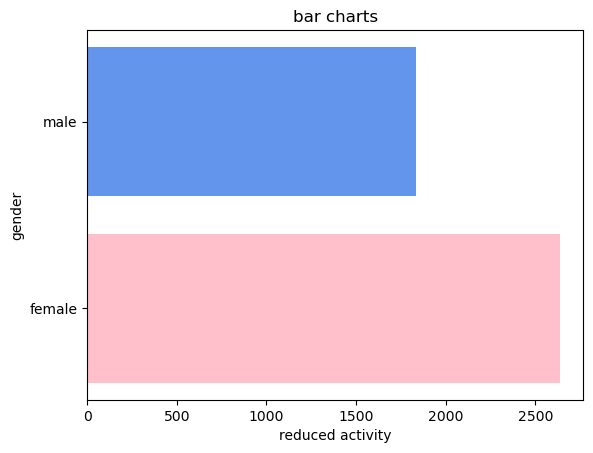

In [20]:
db=df.groupby('gender')['reduced'].sum().to_frame().reset_index()
#creating bar chart
plt.barh(db['gender'],db['reduced'],color=['pink','cornflowerblue'])
#adding the aesthetics
plt.title('bar charts')
plt.xlabel('reduced activity')
plt.ylabel('gender')
plt.show()